In [ ]:
from google.colab import drive, output
data_loaded = False
# drive.mount('/content/drive')
BASE_DIR = "/content/drive/My Drive/face_recognition"
!rm -rf '/content/face_recognition'
!git clone https://github.com/ptran1203/face_recognition
!pip install face_recognition
%cd face_recognition

Cloning into 'face_recognition'...
remote: Enumerating objects: 5586, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5586 (delta 0), reused 0 (delta 0), pack-reused 5583
Receiving objects: 100% (5586/5586), 1.56 GiB | 25.51 MiB/s, done.
Resolving deltas: 100% (237/237), done.


In [2]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 6.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Read data from directory
-> angleababy total: 27: 
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 
-> emma_watson total: 25: 
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 
-> Paula_Abdul total: 23: 
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 
-> liu_yifei total: 24: 
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 
-> Candice_Accola total: 29: 
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 
-> Farrah_Abraham total: 18: 
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
-> charlize_theron total: 27: 
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 
-> Jason_Aldean total: 29: 
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 
-> Tays

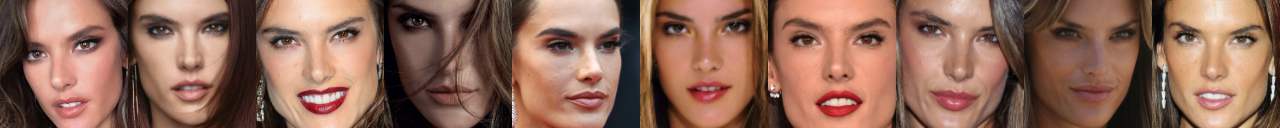

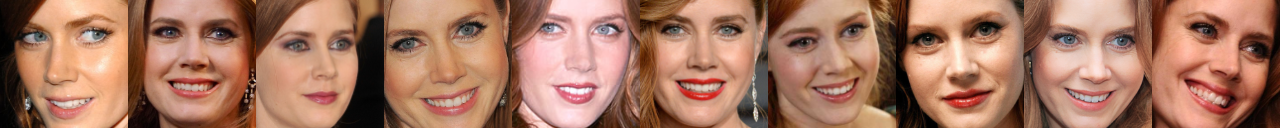

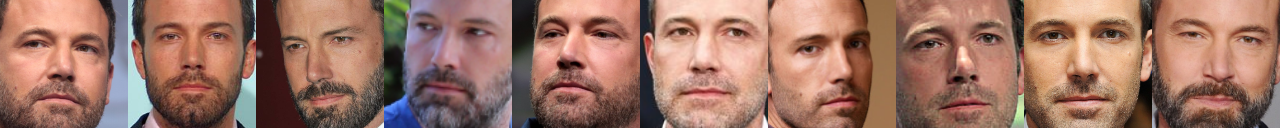

58889256/58889256 [==============================] - 2s 0us/step


In [3]:
from dataloader import *
from model import FaceModel, AutoEncoder
from utils import *
from face_localization import *

import tensorflow as tf

data_path = "./dataset/"

class FaceRecognizer(FaceModel):
    pass

class DataGen(DataGenerator):
    pass

rst = 128
kshot = 10
force_reload = 1
data_gen = DataGen(data_path, 128, rst, split_option=1,
                   test_size=0.2, force_reload_data=force_reload,
                   kshot=kshot)
fmodel = FaceRecognizer(rst, len(data_gen.classes), lr=1e-5)

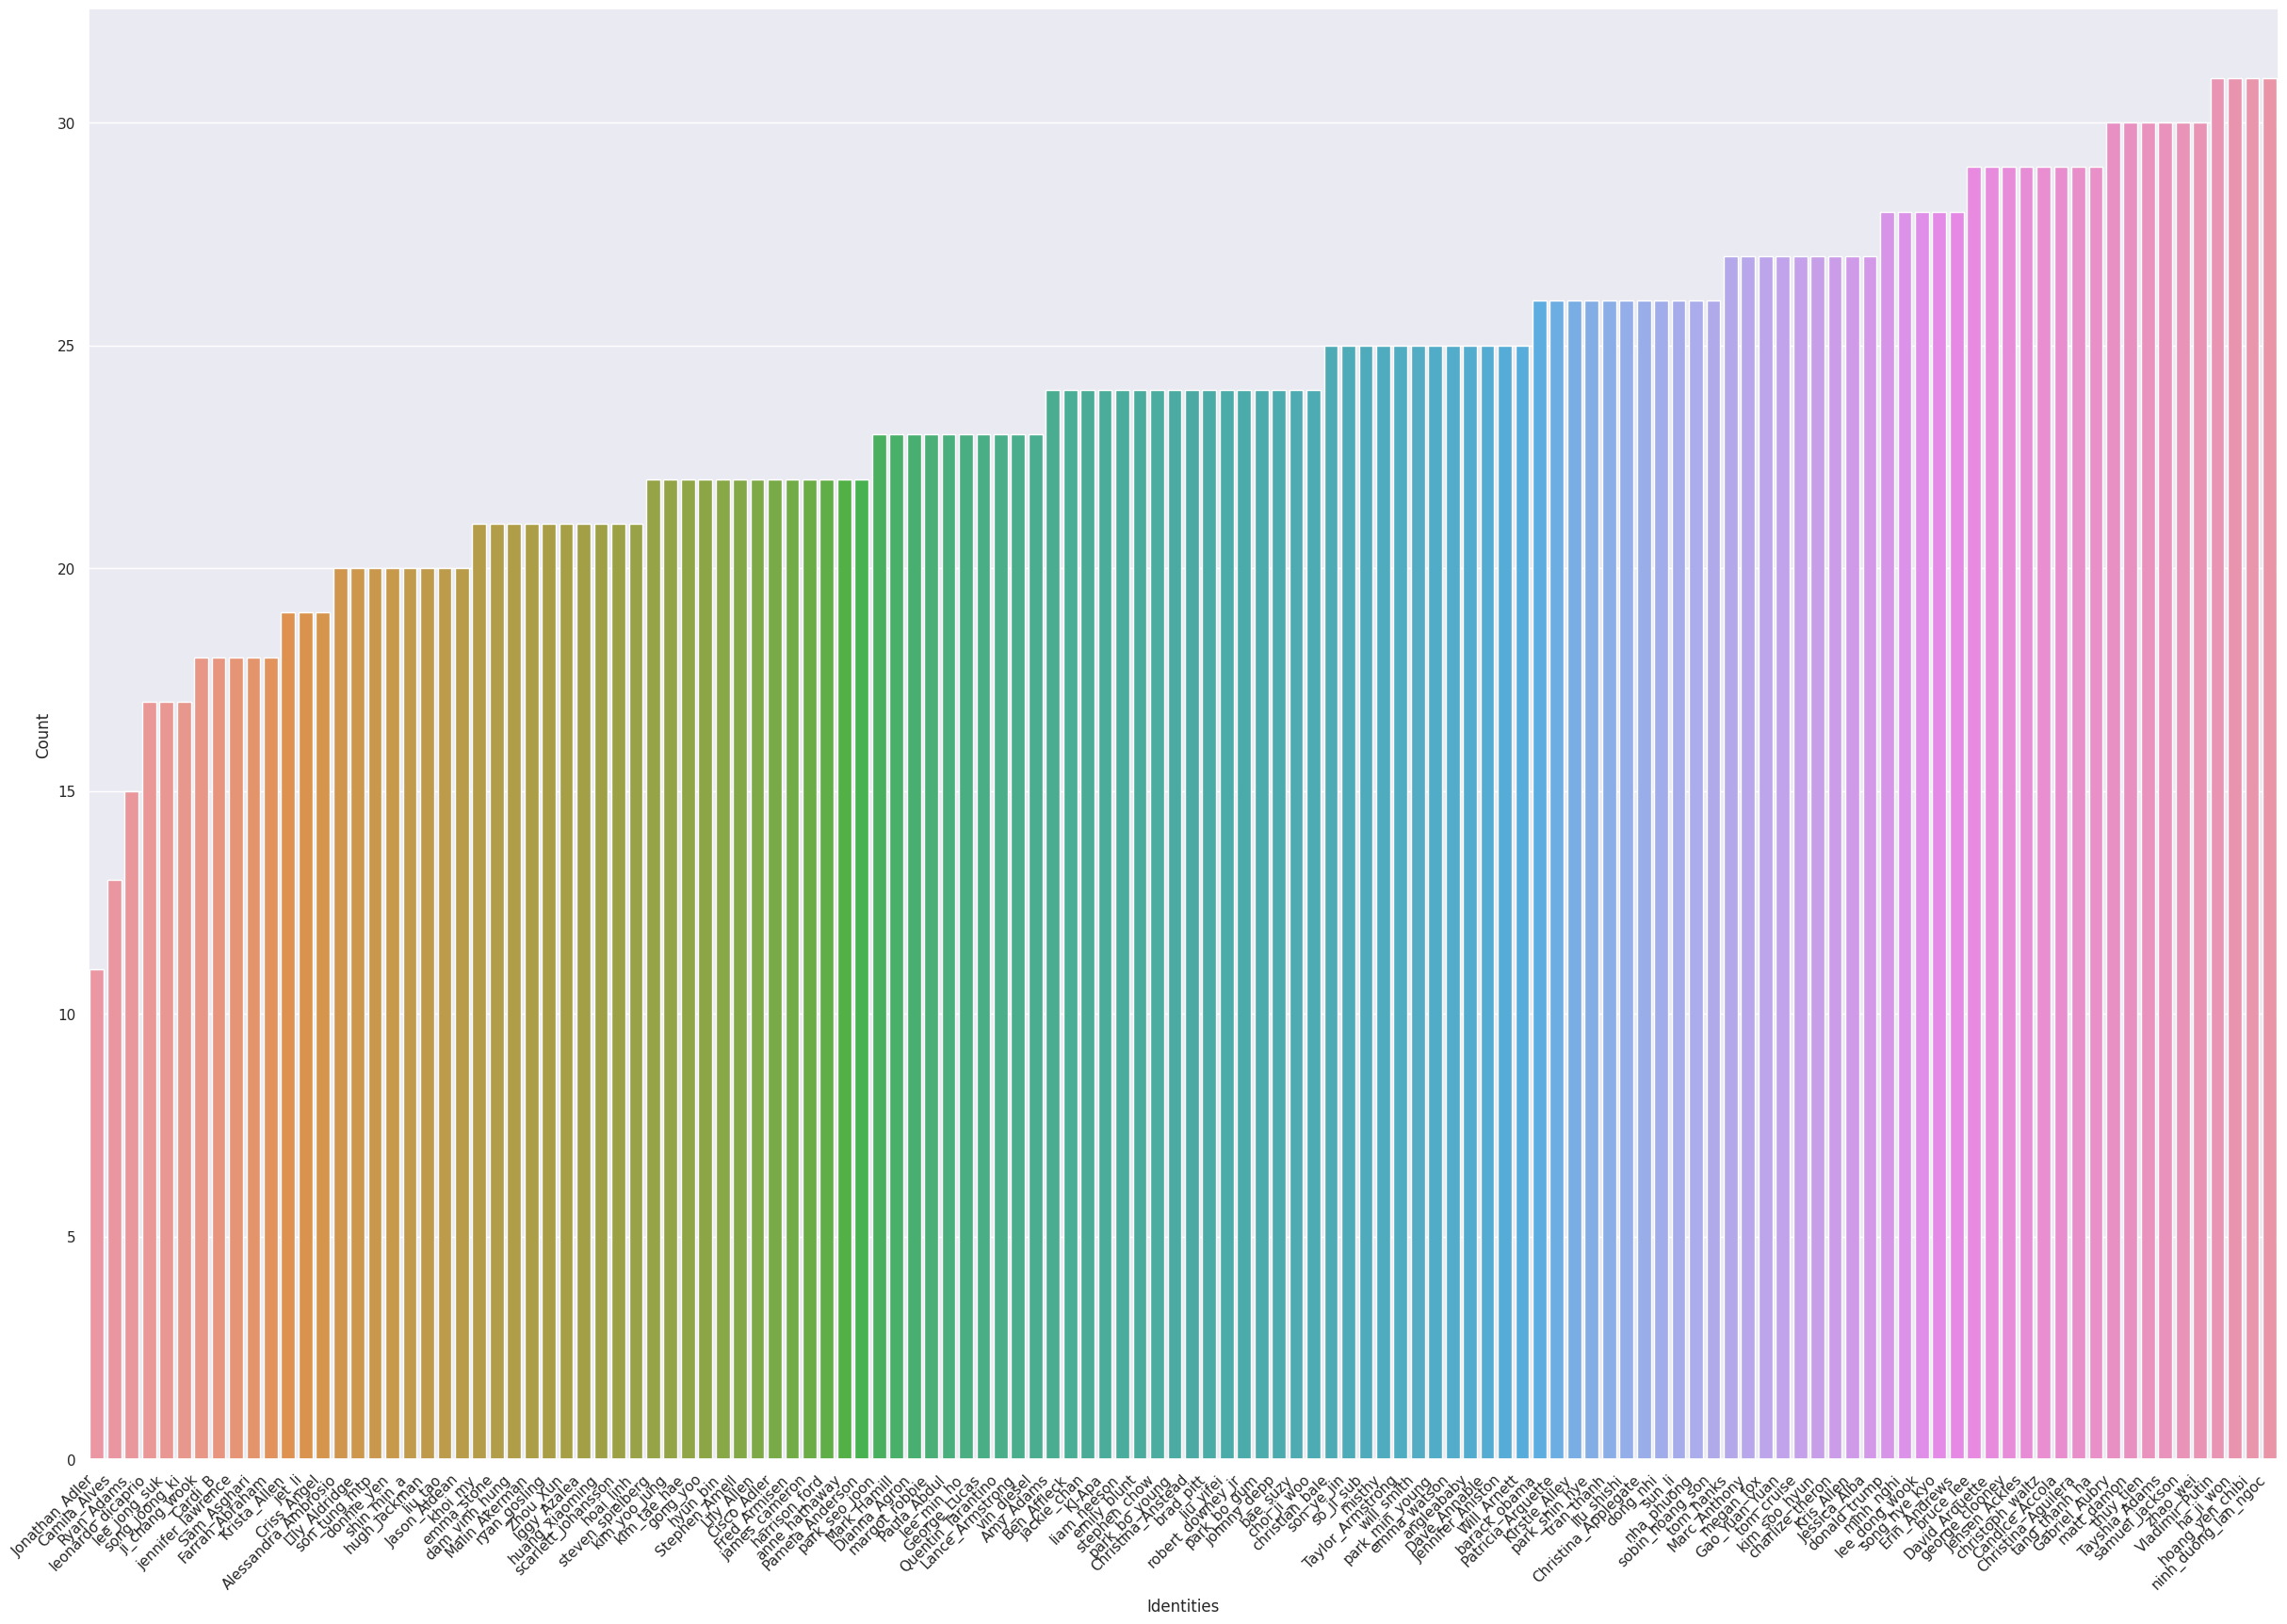

In [4]:
import pandas as pd

def plot_dist(data, figsize=(30, 20)):
    count = dict(Counter(data))
    count = list(count.items())
    count = sorted(count, key=lambda x: x[1])
    df = pd.DataFrame(count)
    df.columns = ["Identities", "Count"]
    plt.figure(figsize=figsize)
    chart = sns.barplot(
        data=df,
        x='Identities',
        y='Count')

    chart.set_xticklabels(chart.get_xticklabels(), rotation=45,
                          horizontalalignment='right')

plot_dist(np.concatenate([data_gen.labels, data_gen.labels_test, data_gen.labels_support]))
# plot_dist(data_gen.labels)



In [6]:
print(
    len(data_gen.y), len(data_gen.y_test)
)
fmodel.train(data_gen, epochs=10)
fmodel.calculate_embeddings(data_gen.x_support, data_gen.y_support)
test_acc, pred_wrong = fmodel.evaluate(data_gen.x_test, data_gen.y_test)
print("Test accuracy: {}%".format(round(test_acc*100, 2)))
# print("Incorrect prediction")
# for i in range(0, len(pred_wrong), 10):
#     show_images(data_gen.x_test[pred_wrong][i: i+10], denorm=True, deprcs=False)

2386 376
Epoch 1/10
32/32 [==============================] - 9s 271ms/step - loss: 0.9666
Epoch 2/10
32/32 [==============================] - 9s 270ms/step - loss: 0.9570
Epoch 3/10
32/32 [==============================] - 9s 271ms/step - loss: 0.9544
Epoch 4/10
32/32 [==============================] - 9s 271ms/step - loss: 0.9443
Epoch 5/10
32/32 [==============================] - 9s 268ms/step - loss: 0.9410
Epoch 6/10
32/32 [==============================] - 9s 269ms/step - loss: 0.9377
Epoch 7/10
32/32 [==============================] - 9s 268ms/step - loss: 0.9227
Epoch 8/10
32/32 [==============================] - 9s 267ms/step - loss: 0.9198
Epoch 9/10
32/32 [==============================] - 9s 269ms/step - loss: 0.9150
Epoch 10/10
1/1 [==============================] - 0s 21ms/step
Test accuracy: 48.14%


In [3]:
x, y, labels = data_gen.x_test, data_gen.y_test, data_gen.labels_test
print(np.unique(labels))
fmodel.calculate_embeddings(x, y)

img = get_image_http(
    "https://cdn.britannica.com/25/157825-050-227F6B8A/Ben-Affleck-2007.jpg"
        #'https://img.ti-media.net/wp/uploads/sites/46/2016/01/Jennifer-Lawrence-Anne-Hathaway-Friends-Actresses-Oscars-L-920x690.jpg'
   # 'https://i.insider.com/5d4aa55136e03c2653381c23?width=600&format=jpeg&auto=webp'
)

def draw_bbox(img, coordinates, text="face", color=(0, 0, 0), offset=35):
    "The pixcel's range should be [0, 255]"
    x, y, w, h = coordinates
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    cv2.rectangle(img, (x + offset, y), (x + w , y -25), color, -1)
    cv2.putText(img, text, (x + w, y - 10), 0, 0.5, (255, 255, 255))

    return img

if img is not None:
    faces, bboxs = extract_multi_faces(img)
    i=0
    for face, bbox in zip(faces, bboxs):
        i+=1
        face = cv2.resize(face, (128,128))
        x, y, ex, ey = bbox
        pred, prob = fmodel.get_prediction(norm(np.expand_dims(face, 0)),
                                    labels)
        print(pred, prob)
        prob_str = str(int(prob*100))
        text = "{} {}%".format(pred, prob_str) \
                if prob > 0.3 else "Undefined"
        offset = 35 if i == 2 else 45
        result = draw_bbox(img, (x, y, ex, ey), text,
                        (148, 148, 3), offset)

    cv2_imshow(result)


NameError: ignored

In [ ]:
import base64
import html
import io
import time

from IPython.display import display, Javascript
from google.colab.output import eval_js
import numpy as np
from PIL import Image
import cv2

def start_input():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 512, 512);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 512; //video.videoWidth;
      captureCanvas.height = 512; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function takePhoto(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def take_photo(label, img_data):
  data = eval_js('takePhoto("{}", "{}")'.format(label, img_data))
  return data

def js_reply_to_image(js_reply):
    """
    input:
          js_reply: JavaScript object, contain image from webcam

    output:
          image_array: image array RGB size 512 x 512 from webcam
    """
    jpeg_bytes = base64.b64decode(js_reply['img'].split(',')[1])
    image_PIL = Image.open(io.BytesIO(jpeg_bytes))
    image_array = np.array(image_PIL)

    return image_array

def drawing_array_to_bytes(drawing_array):
    """
    input:
          drawing_array: image RGBA size 512 x 512
                              contain bounding box and text from yolo prediction,
                              channel A value = 255 if the pixel contains drawing properties (lines, text)
                              else channel A value = 0

    output:
          drawing_bytes: string, encoded from drawing_array
    """

    drawing_PIL = Image.fromarray(drawing_array, 'RGBA')
    iobuf = io.BytesIO()
    drawing_PIL.save(iobuf, format='png')
    drawing_bytes = 'data:image/png;base64,{}'.format((str(base64.b64encode(iobuf.getvalue()), 'utf-8')))
    return drawing_bytes

In [ ]:
start_input()
label_html = 'Capturing...'
img_data = ''
count = 0
size=128

frames = []
x, y, labels = data_gen.x_support, data_gen.y_support, data_gen.labels_support
print(np.unique(labels))
fmodel.calculate_embeddings(x, y)

from face_recognition import face_locations

FACE_SCALE_THRES = (20, 20)


def extract_box(image, single=True):
    """
    return <start_Y>, <start_X>, <end_Y>, <end_X>
    """
    boxs = face_locations(image)

    if len(boxs) == 0:
        return None

    if single:
        return boxs[0]

    return boxs


def _get_face(image, start_y, start_x, end_y, end_x):
    min_x, max_x = min(start_x, end_x), max(start_x, end_x)
    min_y, max_y = min(start_y, end_y), max(start_y, end_y)
    face = image[min_y:max_y, min_x:max_x].copy()
    fh, fw = face.shape[:2]
    # ensure the face width and height are sufficiently large
    if fw < FACE_SCALE_THRES[0] or fh < FACE_SCALE_THRES[1]:
        return None

    return face

def extract_multi_faces(image):
    h, w = image.shape[:2]

    try:
        locations = extract_box(image, single=False)
    except Exception as e:
        return None, None

    faces = []
    bboxs = []
    if locations is not None:
        for location in locations:
            (start_y, start_x, end_y, end_x) = location
            face = _get_face(image, start_y, start_x, end_y, end_x)
            if face is not None:
                faces.append(face)
                bboxs.append((start_x, start_y, end_x - start_x, end_y - start_y))
    else:
        return None, None
    return faces, bboxs

while True:
    js_reply = take_photo(label_html, img_data)
    if not js_reply:
        break

    image = js_reply_to_image(js_reply)
    faces, bboxs = extract_multi_faces(image)
    img_array = np.zeros((512,512,4), dtype=np.uint8)
    if faces is not None and len(faces):
        for face, bbox in zip(faces, bboxs):
            face = cv2.resize(face, (128,128))
            x, y, ex, ey = bbox
            pred, prob = fmodel.get_prediction(norm(np.expand_dims(face, 0)),
                                        labels)
            prob_str = str(int(prob*100))
            text = "{} {}%".format(pred, prob_str) \
                    if prob > 0.3 else "Undefined"
            result = draw_bbox(img_array, (x, y, ex, ey), text,
                            (148, 148, 3))

    img_array[:,:,3] = (img_array.max(axis = 2) > 0 ).astype(int) * 255
    img_data = drawing_array_to_bytes(img_array)
